# Collect archived Airnow Data

Use the API to download Airnow data from select stations

## Load python packages

In [1]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import datetime
from pathlib import Path # System agnostic paths

import requests # for url requests
import json # for json reading/writing
import time # for epoch timestamp
import csv # for writing csv files

with open("../api_key.txt") as f:
    email, pwd = f.read().split(",")

## Setup website query keys

In [2]:
url = 'https://aqs.epa.gov/data/api/sampleData/bySite?'

with open("payloads.txt") as f:
    f.readline() # skip header
    for lines in f:
        param, bdate, edate, state, county, site, fname = lines.split(",")

keys = {
        'email': 'email', #for access to the api
        'key': 'pwd', #for access to the api
        'param': 'param', #88500 ("PM2.5 Total Atmospheric" for CU Athens) or 88101 ("PM2.5 Local Conditions" for Longmont)
        'bdate': 'bdate', #begin date (modify as needed, YYYYMMDD)
        'edate': 'edate', #end date (modify as needed, YYYYMMDD)
        'state': 'state', #Colorado
        'county': 'county', #Boulder County
        'site': 'site', #1001 (for CU Athens) or 0003 (for Longmont)
        }


query_AirNow = requests.get(url, keys)

## Use json reader to convert and pandas to format into array

In [3]:
response_list = query_AirNow.json()
# Uncomment below to see the result of the website query
# response_list

In [4]:
data_extract = pd.DataFrame(response_list.get('Data'))
data_extract

""


## Note the API is in reverse order: edate is at the top of the record, bdate is at the bottom of the record so need to reorder:

In [5]:
data = data_extract[::-1]

## Query the column headers to figure out what to extract

In [6]:
data.columns

Index([], dtype='object')

## Extract data separately to make sure formatting is correct.

In [12]:
# Use pandas to convert to datetime format
extracted_date = pd.to_datetime(data['date_gmt'] + ' ' +data['time_gmt'])
# PM2.5 should be a float
extracted_pm25 = data['sample_measurement']

## Plot

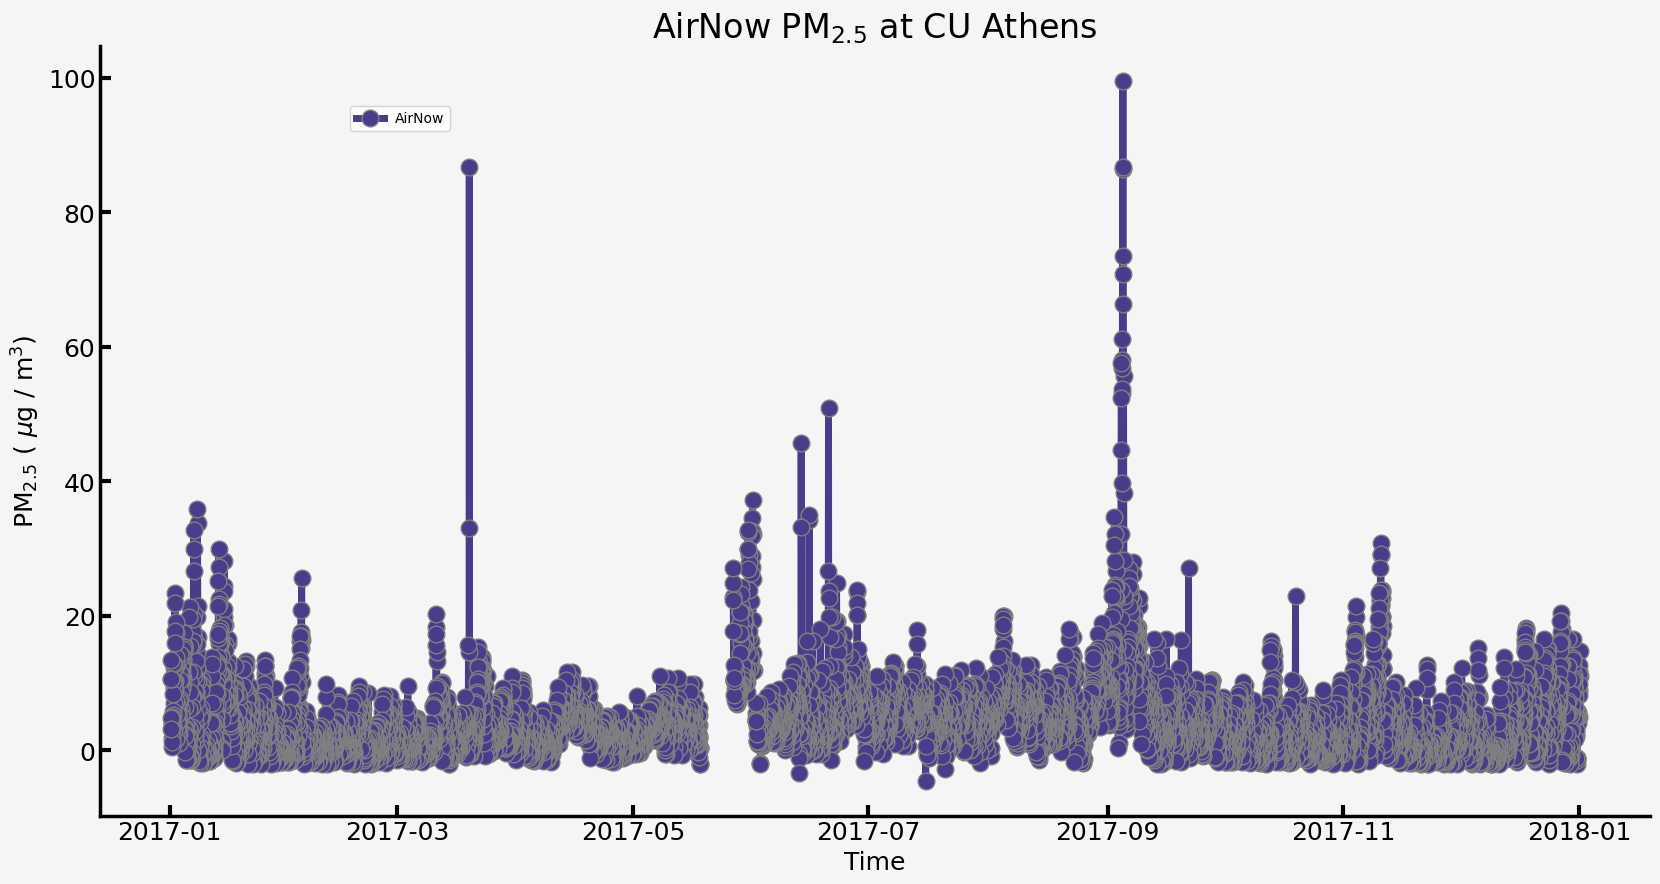

In [13]:
plt.figure(figsize=(20,10),facecolor='whitesmoke')
ax = plt.axes(facecolor='whitesmoke')

plt.plot(extracted_date, extracted_pm25, '-o', label='AirNow',
         color='darkslateblue',
         markersize=12, linewidth=5,
         markerfacecolor='darkslateblue',
         markeredgecolor='grey',
         markeredgewidth=1)

#resources: named colors - https://matplotlib.org/examples/color/named_colors.html
#           default markers and lines list - https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html


# axes format
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#ax.set_ylim(90, 200)
#plt.yticks(np.arange(0, 50, step=20), fontsize=18)

# tickmarks direction
ax.tick_params(direction='in', length=8, width=3)

# adjust border
ax.spines["left"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# titles
plt.title('AirNow PM$_{2.5}$ at CU Athens',fontsize=24)
plt.xlabel('Time',fontsize=18)
plt.ylabel('PM$_{2.5}$ ( $\mu$g / m$^3$)',fontsize=18)

# legend
plt.legend(bbox_to_anchor=(0.23, 0.88),loc='lower right')

# write to show the whole plot
plt.show()
#plt.savefig('AirNow_timeseries_CUAthens.png')